In [1]:
import pymysql
import sqlalchemy as sa
from sqlalchemy import inspect
from sqlalchemy import create_engine
import pandas as pd 

In [2]:
df = pd.read_csv('customer_churn.csv')

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
#this is the var that we want to predict
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [6]:
df['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

In [7]:
df['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [8]:
df['MonthlyCharges'].unique()

array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ])

In [9]:
#lets start droping columns

df1=df[['SeniorCitizen','tenure','MonthlyCharges','Churn']]

In [10]:
df1

,SeniorCitizen,tenure,MonthlyCharges,Churn
0,0,1,29.85,No
1,0,34,56.95,No
2,0,2,53.85,Yes
3,0,45,42.30,No
4,0,2,70.70,Yes
...,...,...,...,...
7038,0,24,84.80,No
7039,0,72,103.20,No
7040,0,11,29.60,No
7041,1,4,74.40,Yes


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SeniorCitizen   7043 non-null   int64  
 1   tenure          7043 non-null   int64  
 2   MonthlyCharges  7043 non-null   float64
 3   Churn           7043 non-null   object 
dtypes: float64(1), int64(2), object(1)
memory usage: 220.2+ KB


5 Build the logistic regression model.

In [12]:
y = df1['Churn']

In [13]:
x=df1.drop(['Churn'], axis=1)

In [14]:

def YNto10(s):
    if s == 'Yes':
        return 1
    else:
        return 0

In [15]:
y=pd.Series(list(map(YNto10,y)))

In [16]:
x.shape

(7043, 3)

In [17]:
y.shape

(7043,)

In [18]:
#import the tool to scale

from sklearn.preprocessing import MinMaxScaler

In [19]:
#lets scale
scaler = MinMaxScaler()

x = scaler.fit_transform(x.to_numpy())
x = pd.DataFrame(x, columns=['tenure', 'SeniorCitizen', 'MonthlyCharges'])

In [20]:
#now lets build the model


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [21]:
logreg=LogisticRegression(max_iter=300)

In [22]:
#train test split

X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.3, random_state=40)

In [23]:
#train the model
clf=logreg.fit(X_train,Y_train)

In [24]:
#get some results from the model
y_pred=clf.predict(X_test)

In [25]:
#now lets evaluate - import tools
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix


In [26]:
#evaluate accuracy

accuracy_score(Y_test, y_pred)

0.7827733080927591

In [27]:
#lets get the confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay

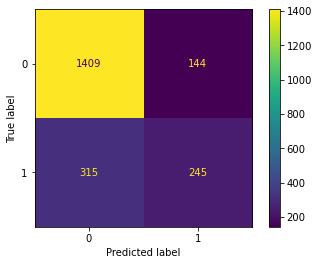

In [28]:

cm = confusion_matrix(Y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()

In [29]:
# AUC roc curve etc

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

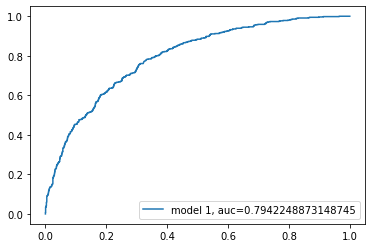

In [30]:
# lets build the roc curve


y_pred_prob=clf.predict_proba(X_test)[::,1]

fpr,tpr,_=roc_curve(Y_test, y_pred_prob)

auc=roc_auc_score(Y_test,y_pred_prob)

plt.plot(fpr,tpr,label='model 1, auc='+str(auc))

plt.legend(loc=4)
plt.show()

In [50]:
target_names= ['0', '1']
print(classification_report(Y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1553
           1       0.63      0.44      0.52       560

    accuracy                           0.78      2113
   macro avg       0.72      0.67      0.69      2113
weighted avg       0.77      0.78      0.77      2113



In [31]:
#lets try to use SMOTE

from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from collections import Counter

In [32]:
#to use smote effectively we need to look at the proportions
#as we got on the cell 5 using df['Churn'].value_counts()
#No     5174
#Yes    1869
#
#total 7043 ---> 0.73463 of No, (1-0.73463)=0.26537 of Yes

X_sm, Y_sm = make_classification(n_samples=7043, n_features=2, n_redundant=0, 
                           n_clusters_per_class=1, weights=[0.73463,0.26537], flip_y=0, random_state=41)

In [33]:
sm = SMOTE()

In [34]:
#resample using smot
X_sm,Y_sm=sm.fit_resample(x,y)

In [35]:
#lets look if our smote worked

counter = Counter(y)
print(counter)

counter = Counter(Y_sm)
print(counter)

Counter({0: 5174, 1: 1869})
Counter({0: 5174, 1: 5174})


In [36]:
#lets see the shapes to be sure that we are working with all OK
Y_sm.shape

(10348,)

In [37]:
X_sm.shape

(10348, 3)

In [38]:
#lets do the split for the new model

X_train_sm, X_test_sm, Y_train_sm, Y_test_sm = train_test_split(X_sm, Y_sm, test_size=0.3, random_state=40)

In [39]:
#now lets train our model feeding data that was modified with SMOT
clf_sm=logreg.fit(X_train_sm,Y_train_sm)

In [40]:
#now lets get some predictions made by our model

y_pred_sm=clf_sm.predict(X_test_sm)

In [41]:
#evaluate accuracy

accuracy_score(Y_test_sm, y_pred_sm)

0.7326892109500805

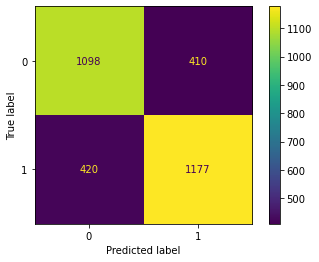

In [45]:
#lets show the confusion matrix

cm = confusion_matrix(Y_test_sm, y_pred_sm, labels=clf_sm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf_sm.classes_)
disp.plot()

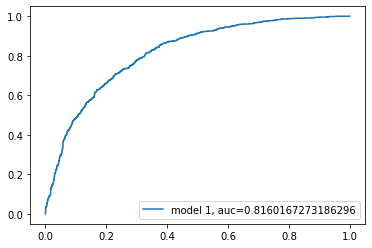

In [46]:
# lets build the roc curve


y_pred_prob=clf.predict_proba(X_test_sm)[::,1]

fpr,tpr,_=roc_curve(Y_test_sm, y_pred_prob)

auc=roc_auc_score(Y_test_sm,y_pred_prob)

plt.plot(fpr,tpr,label='model 1, auc='+str(auc))

plt.legend(loc=4)
plt.show()

In [47]:
target_names= ['0', '1']
print(classification_report(Y_test_sm, y_pred_sm, target_names=target_names))

              precision    recall  f1-score   support

           0       0.72      0.73      0.73      1508
           1       0.74      0.74      0.74      1597

    accuracy                           0.73      3105
   macro avg       0.73      0.73      0.73      3105
weighted avg       0.73      0.73      0.73      3105



In [49]:
from imblearn.under_sampling import TomekLinks

In [51]:
tomek = TomekLinks()

In [52]:
X_tl,y_tl=tomek.fit_resample(x,y)

In [53]:
y_tl.shape

(6563,)

In [55]:
X_tl.shape

(6563, 3)

In [56]:
X_train_tl, X_test_tl, y_train_tl, y_test_tl = train_test_split(X_tl, y_tl, test_size=0.3, random_state=40)

In [57]:
clf_tl=logreg.fit(X_train_tl,y_train_tl)

In [58]:
y_pred_tl=clf_tl.predict(X_test_tl)

In [59]:
accuracy_score(y_test_tl,y_pred_tl)

0.7760284408329101

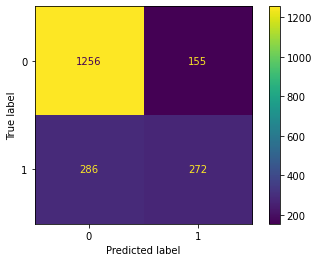

In [60]:
#lets show the confusion matrix

cm = confusion_matrix(y_test_tl, y_pred_tl, labels=clf_tl.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf_tl.classes_)
disp.plot()

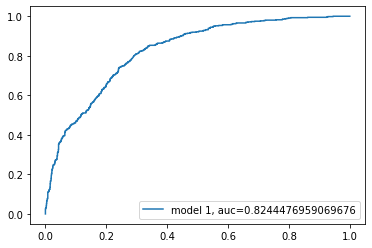

In [61]:
# lets build the roc curve


y_pred_prob=clf.predict_proba(X_test_tl)[::,1]

fpr,tpr,_=roc_curve(y_test_tl, y_pred_prob)

auc=roc_auc_score(y_test_tl,y_pred_prob)

plt.plot(fpr,tpr,label='model 1, auc='+str(auc))

plt.legend(loc=4)
plt.show()

In [62]:
target_names= ['0', '1']
print(classification_report(y_test_tl, y_pred_tl, target_names=target_names))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1411
           1       0.64      0.49      0.55       558

    accuracy                           0.78      1969
   macro avg       0.73      0.69      0.70      1969
weighted avg       0.76      0.78      0.77      1969

